# IBM Data Science Capstone
Clustering data in Rome, Italy

Import needed libraries

In [1]:
import numpy as np
import pandas as pd
#!pip install folium
import folium
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#!conda install -c conda-forge geopy --yes
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 
import requests

Getting Rome subdivision data

In [2]:
data = {'Subdivision': ['Ponte Milvio', 'Flaminio', 'Tridente', 
                         'Prati', 'Vaticano','Centro Storico',
                        'Esquilino', 'Monti', 'Colosseum & Aventino',
                        'Testaccio', 'Trastevere'],
       'Latitude': [41.93659727182252, 41.91278920024912, 41.90354584169714, 
                   41.908865682170024, 41.90374959134496, 41.90012427462999,
                   41.89308235767184, 41.894811301283355, 41.89136711236395, 
                   41.87875304632575, 41.88490417735073],
       'Longitude': [12.466984662972658, 12.475720306569498, 12.485057221328029,
                    12.463967917128494, 12.453520329548695,  12.476121538277663,
                    12.510447933198856, 12.492077973677128, 12.492384540601671,
                    12.475180486085424, 12.468829736186658]}

df = pd.DataFrame (data, columns = ['Subdivision', 'Latitude', 'Longitude'])
df

,Subdivision,Latitude,Longitude
0,Ponte Milvio,41.936597,12.466985
1,Flaminio,41.912789,12.475720
2,Tridente,41.903546,12.485057
3,Prati,41.908866,12.463968
4,Vaticano,41.903750,12.453520
5,Centro Storico,41.900124,12.476122
6,Esquilino,41.893082,12.510448
7,Monti,41.894811,12.492078
8,Colosseum & Aventino,41.891367,12.492385
9,Testaccio,41.878753,12.475180


Map Subdivisions

In [3]:
# create map
map = folium.Map(location = [41.912789, 12.475720], zoom_start = 12)

# add markers to map
for lat, lng, sub in zip(df['Latitude'], df['Longitude'], df['Subdivision']):
    label = '{}'.format(sub)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map)

map

Setting Up Foursquare Connection

In [4]:
CLIENT_ID = 'IH04PPQQSWNOAJ3YFTMWIE0OEHM2XCG4PXMPK4NGWVWLRY1G' # your Foursquare ID
CLIENT_SECRET = 'KS3CGQBB4ZJHIQUM3MA5QZZ0DSXPRHBSM5DCWTSRF2MRUB0B' # your Foursquare Secret
#ACCESS_TOKEN = 'OWQH4HT0HGV13OQTBQVAM5WM4KVW1W4PDJHM1E5NA10PXBYX' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 3000 # A default Foursquare API limit value

Pulling Foursquare Data

In [5]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Subdivision', 
                  'Subdivision Latitude', 
                  'Subdivision Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [6]:
rome_venues = getNearbyVenues(names = df['Subdivision'],
                                   latitudes = df['Latitude'],
                                   longitudes = df['Longitude'])

Ponte Milvio
Flaminio
Tridente
Prati
Vaticano
Centro Storico
Esquilino
Monti
Colosseum & Aventino
Testaccio
Trastevere


Cleaning Venue Category

In [7]:
print(rome_venues.shape)
print(sorted(rome_venues['Venue Category'].unique()))
rome_venues.head()

(697, 7)
['Abruzzo Restaurant', 'Accessories Store', 'American Restaurant', 'Argentinian Restaurant', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Athletics & Sports', 'Bakery', 'Bar', 'Bed & Breakfast', 'Beer Bar', 'Beer Garden', 'Beer Store', 'Bistro', 'Bookstore', 'Boutique', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bubble Tea Shop', 'Burger Joint', 'Café', 'Cemetery', 'Chinese Restaurant', 'Church', 'Clothing Store', 'Cocktail Bar', 'Coffee Shop', 'Comfort Food Restaurant', 'Comic Shop', 'Concert Hall', 'Convenience Store', 'Cosmetics Shop', 'Cupcake Shop', 'Deli / Bodega', 'Department Store', 'Dessert Shop', 'Diner', 'Event Space', 'Farmers Market', 'Fast Food Restaurant', 'Filipino Restaurant', 'Flea Market', 'Food', 'Food & Drink Shop', 'Fountain', 'French Restaurant', 'Furniture / Home Store', 'Garden', 'Gastropub', 'German Restaurant', 'Gift Shop', 'Gluten-free Restaurant', 'Gourmet Shop', 'Greek Restaurant', 'Gym', 'Historic Site', 'History Museum', 'Host

,Subdivision,Subdivision Latitude,Subdivision Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ponte Milvio,41.936597,12.466985,I Fritti De Sora Milvia,41.938106,12.465908,Fast Food Restaurant
1,Ponte Milvio,41.936597,12.466985,Gelateria Mondi,41.937862,12.467650,Ice Cream Shop
2,Ponte Milvio,41.936597,12.466985,Roma Beer Company - Ponte Milvio,41.937227,12.466456,Pub
3,Ponte Milvio,41.936597,12.466985,Charlie,41.937688,12.466808,Wine Bar
4,Ponte Milvio,41.936597,12.466985,Dulcamara,41.937670,12.466560,Restaurant


In [8]:
rome_venues = rome_venues.replace({'Venue Category': {'Fast Food Restaurant':'Fast Food', 'Ice Cream Shop':'Dessert', 'Pub':'Alcohol', 
                                        'Wine Bar':'Alcohol', 'Sandwich Place':'Food',
 'Dessert Shop':'Dessert', 'Restaurant':'Food', 'Spanish Restaurant':'Food', 'Sushi Restaurant':'Food',
 'Cupcake Shop':'Dessert', 'Bakery':'Food', 'Bookstore':'Unwanted', 'Italian Restaurant':'Food', 'Cocktail Bar':'Alcohol',
 'Pizza Place':'Food', 'Brewery':'Alcohol', 'Gastropub':'Alcohol', 'Hotel':'Unwanted', 'Steakhouse':'Food',
 'American Restaurant':'Food', 'Monument / Landmark':'Outdoors', 'Plaza':'Outdoors', 'Bed & Breakfast':'Unwanted',
 'Mediterranean Restaurant':'Food', 'Garden':'Outdoors', 'Bistro':'Food', 'Wine Shop':'Alcohol',
 'Accessories Store':'Unwanted', 'Trattoria/Osteria':'Food', 'Nightclub':'Alcohol', 'Japanese Restaurant':'Food',
 'Hotel Bar':'Alcohol', 'Clothing Store':'Unwanted', 'Art Museum':'Museum', 'Cosmetics Shop':'Unwanted',
 'Arts & Crafts Store':'Unwanted', 'German Restaurant':'Food', 'Vegetarian / Vegan Restaurant':'Food',
 'Sporting Goods Shop':'Unwanted', 'Boutique':'Store', 'Café':'Food', 'Jazz Club':'Alcohol', 'Shopping Mall':'Unwanted',
 'Brazilian Restaurant':'Food', 'Juice Bar':'Dessert', 'Bar':'Alcohol', 'Fountain':'Outdoors', 'Historic Site':'Outdoors',
 'Jewelry Store':'Unwanted', 'Gift Shop':'Store', 'Road':'Outdoors', "Women's Store":'Unwanted', 'Lingerie Store':'Unwanted',
 'Toy / Game Store':'Unwanted', 'Gourmet Shop':'Unwanted', 'Deli / Bodega':'Unwanted', 'Department Store':'Unwanted',
 'Seafood Restaurant':'Food', 'Comic Shop':'Unwanted', 'Pastry Shop':'Dessert', 'Hostel':'Unwanted',
 'Filipino Restaurant':'Food', 'Pet Store':'Unwanted', 'Church':'Religious Site', 'Scenic Lookout':'Outdoors',
 'Art Gallery':'Museum', 'History Museum':'Museum', 'Sculpture Garden':'Outdoors', 'Beer Bar':'Alcohol',
 'Mexican Restaurant':'Food', 'Convenience Store':'Unwanted', 'Indian Restaurant':'Food',
 'Cemetery':'Unwanted', 'Coffee Shop':'Dessert', 'Lounge':'Unwanted', 'Argentinian Restaurant':'Food',
 'French Restaurant':'Food', 'Roman Restaurant':'Food', 'Pie Shop':'Dessert', 'Furniture / Home Store':'Unwanted',
 'Comfort Food Restaurant':'Food', 'Diner':'Food', 'Abruzzo Restaurant':'Food',
 'Food & Drink Shop':'Food', 'Chinese Restaurant':'Food', 'Farmers Market':'Unwanted', 'Supermarket':'Unwanted',
 'Beer Garden':'Outdoors', 'Theater':'Art', 'Other Nightlife':'Alcohol', 'Rock Club':'Alcohol', 'Bubble Tea Shop':'Dessert',
 'Burger Joint':'Food', 'Flea Market':'Unwanted', 'Noodle House':'Food', 'Concert Hall':'Art', 
    'Public Art':'Art', 'Salad Place':'Food', 'Taco Place':'Food',
 'Outdoors & Recreation':'Unwanted', 'Park':'Unwanted', 'Racetrack':'Outdoors', 'Irish Pub':'Alcohol', 'Beer Store':'Alcohol',
 'Temple':'Religious Site', 'Roof Deck':'Unwanted', 'Market':'Unwanted', 'Event Space':'Unwanted', 'Music Venue':'Art',
 'Athletics & Sports':'Unwanted', 'Multiplex':'Unwanted', 'Performing Arts Venue':'Art', 'Breakfast Spot':'Food',
 'Greek Restaurant':'Food', 'Gluten-free Restaurant':'Food', 'Indie Movie Theater':'Unwanted', 'Gym':'Unwanted', 'Train Station':'Unwanted'}})

print(rome_venues['Venue Category'].unique())

['Fast Food' 'Dessert' 'Alcohol' 'Food' 'Unwanted' 'Outdoors' 'Museum'
 'Store' 'Religious Site' 'Art']


In [9]:
#removing the "unwanted" rows
rome_venues = rome_venues[rome_venues['Venue Category'] != 'Unwanted']
print(rome_venues['Venue Category'].unique())

['Fast Food' 'Dessert' 'Alcohol' 'Food' 'Outdoors' 'Museum' 'Store'
 'Religious Site' 'Art']


In [10]:
rome_venues.groupby('Subdivision').count()

,Subdivision Latitude,Subdivision Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Subdivision,,,,,,
Centro Storico,85,85,85,85,85,85
Colosseum & Aventino,47,47,47,47,47,47
Esquilino,60,60,60,60,60,60
Flaminio,35,35,35,35,35,35
Monti,52,52,52,52,52,52
Ponte Milvio,36,36,36,36,36,36
Prati,31,31,31,31,31,31
Testaccio,61,61,61,61,61,61
Trastevere,40,40,40,40,40,40


Mapping Raw Data (i.e. Unclustered)

In [11]:
df = rome_venues

# create map
map = folium.Map(location = [41.912789, 12.475720], zoom_start = 12)

# add markers to map
for lat, lng, sub, venue, venue_cat in zip(df['Venue Latitude'], df['Venue Longitude'], df['Subdivision'], df['Venue'], df['Venue Category']):
    label = '{}, {}, {}'.format(sub, venue_cat, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(map)

map

Find the most common Venue Category (Optional Step)

In [12]:
# one hot encoding
rome_onehot = pd.get_dummies(rome_venues[['Venue Category']], prefix = "", prefix_sep =    "")

# add subdivision column back to dataframe
rome_onehot['Subdivision'] = rome_venues['Subdivision'] 

# move subdivision column to the first column
fixed_columns = [rome_onehot.columns[-1]] + list(rome_onehot.columns[:-1])
rome_onehot = rome_onehot[fixed_columns]

rome_onehot.head()

,Subdivision,Alcohol,Art,Dessert,Fast Food,Food,Museum,Outdoors,Religious Site,Store
0,Ponte Milvio,0,0,0,1,0,0,0,0,0
1,Ponte Milvio,0,0,1,0,0,0,0,0,0
2,Ponte Milvio,1,0,0,0,0,0,0,0,0
3,Ponte Milvio,1,0,0,0,0,0,0,0,0
4,Ponte Milvio,0,0,0,0,1,0,0,0,0


In [13]:
rome_grouped = rome_onehot.groupby('Subdivision').mean().reset_index()
rome_grouped

,Subdivision,Alcohol,Art,Dessert,Fast Food,Food,Museum,Outdoors,Religious Site,Store
0,Centro Storico,0.058824,0.000000,0.117647,0.000000,0.541176,0.035294,0.200000,0.035294,0.011765
1,Colosseum & Aventino,0.212766,0.021277,0.085106,0.000000,0.510638,0.000000,0.127660,0.042553,0.000000
2,Esquilino,0.166667,0.033333,0.066667,0.000000,0.666667,0.000000,0.066667,0.000000,0.000000
3,Flaminio,0.142857,0.000000,0.057143,0.028571,0.571429,0.057143,0.142857,0.000000,0.000000
4,Monti,0.134615,0.038462,0.134615,0.019231,0.500000,0.019231,0.153846,0.000000,0.000000
5,Ponte Milvio,0.222222,0.000000,0.138889,0.027778,0.611111,0.000000,0.000000,0.000000,0.000000
6,Prati,0.096774,0.000000,0.096774,0.000000,0.806452,0.000000,0.000000,0.000000,0.000000
7,Testaccio,0.196721,0.065574,0.081967,0.016393,0.557377,0.016393,0.065574,0.000000,0.000000
8,Trastevere,0.125000,0.025000,0.125000,0.000000,0.625000,0.000000,0.075000,0.025000,0.000000
9,Tridente,0.042857,0.000000,0.171429,0.014286,0.428571,0.014286,0.242857,0.000000,0.085714


In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [15]:
num_top_venues = 9

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Subdivision']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
sub_venues_sorted = pd.DataFrame(columns=columns)
sub_venues_sorted['Subdivision'] = rome_grouped['Subdivision']

for ind in np.arange(rome_grouped.shape[0]):
    sub_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rome_grouped.iloc[ind, :], num_top_venues)

sub_venues_sorted

,Subdivision,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue
0,Centro Storico,Food,Outdoors,Dessert,Alcohol,Religious Site,Museum,Store,Fast Food,Art
1,Colosseum & Aventino,Food,Alcohol,Outdoors,Dessert,Religious Site,Art,Store,Museum,Fast Food
2,Esquilino,Food,Alcohol,Outdoors,Dessert,Art,Store,Religious Site,Museum,Fast Food
3,Flaminio,Food,Outdoors,Alcohol,Museum,Dessert,Fast Food,Store,Religious Site,Art
4,Monti,Food,Outdoors,Dessert,Alcohol,Art,Museum,Fast Food,Store,Religious Site
5,Ponte Milvio,Food,Alcohol,Dessert,Fast Food,Store,Religious Site,Outdoors,Museum,Art
6,Prati,Food,Dessert,Alcohol,Store,Religious Site,Outdoors,Museum,Fast Food,Art
7,Testaccio,Food,Alcohol,Dessert,Outdoors,Art,Museum,Fast Food,Store,Religious Site
8,Trastevere,Food,Dessert,Alcohol,Outdoors,Religious Site,Art,Store,Museum,Fast Food
9,Tridente,Food,Outdoors,Dessert,Store,Alcohol,Museum,Fast Food,Religious Site,Art


K-means Clustering by Location

In [16]:
df = rome_venues
df.head()

,Subdivision,Subdivision Latitude,Subdivision Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ponte Milvio,41.936597,12.466985,I Fritti De Sora Milvia,41.938106,12.465908,Fast Food
1,Ponte Milvio,41.936597,12.466985,Gelateria Mondi,41.937862,12.467650,Dessert
2,Ponte Milvio,41.936597,12.466985,Roma Beer Company - Ponte Milvio,41.937227,12.466456,Alcohol
3,Ponte Milvio,41.936597,12.466985,Charlie,41.937688,12.466808,Alcohol
4,Ponte Milvio,41.936597,12.466985,Dulcamara,41.937670,12.466560,Food


Using Silhouette Value to Find the Optimal K value

[0.3941075064796957, 0.39887208273394564, 0.5150662187104782, 0.5744862053868873, 0.6073073075803347, 0.57835176405729, 0.6036400638721717, 0.6118185144472795, 0.6053411196053806, 0.5882718634899604]


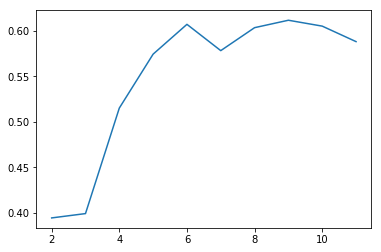

In [17]:
df_clustering = df.drop(['Subdivision', 'Subdivision Latitude', 'Subdivision Longitude', 'Venue', 'Venue Category'], 1)

sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax + 1):
  kmeans = KMeans(n_clusters = k).fit(df_clustering)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_clustering, labels, metric = 'euclidean'))

print(sil)

plt.plot([2,3,4,5,6,7,8,9,10,11], sil) 
plt.show()

In [18]:
# set number of clusters based on silhouette
k = 9

# run k-means clustering
kmeans = KMeans(n_clusters = k, random_state = 0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_
df.insert(0, 'Cluster Labels', kmeans.labels_)
df.head()

,Cluster Labels,Subdivision,Subdivision Latitude,Subdivision Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4,Ponte Milvio,41.936597,12.466985,I Fritti De Sora Milvia,41.938106,12.465908,Fast Food
1,4,Ponte Milvio,41.936597,12.466985,Gelateria Mondi,41.937862,12.467650,Dessert
2,4,Ponte Milvio,41.936597,12.466985,Roma Beer Company - Ponte Milvio,41.937227,12.466456,Alcohol
3,4,Ponte Milvio,41.936597,12.466985,Charlie,41.937688,12.466808,Alcohol
4,4,Ponte Milvio,41.936597,12.466985,Dulcamara,41.937670,12.466560,Food


In [19]:
map_clusters = folium.Map(location = [41.912789, 12.475720], zoom_start = 12)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, sub, cluster, venue, venue_cat in zip(df['Venue Latitude'], df['Venue Longitude'], df['Subdivision'], df['Cluster Labels'], df['Venue'], df['Venue Category']):
    label = '{}, {}, {}'.format(sub, venue_cat, venue)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius = 5,
        popup = label,
        color = rainbow[cluster - 1],
        fill = True,
        fill_color = rainbow[cluster - 1],
        fill_opacity = 0.7).add_to(map_clusters)
       
map_clusters